Please enter the path of you csv file:/home/skont/Desktop/pq_nomad.csv


<IPython.core.display.Javascript object>


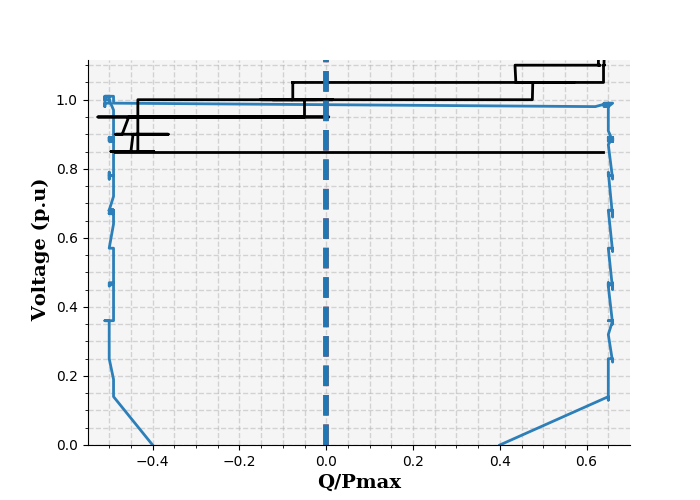

Text(0.5, 0, 'Q/Pmax')

In [2]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)

p=[data['ppc:P0_Scaled'][i] for i in reversed(range(414))]
p=p+data['ppc:P0_Scaled'][414:].tolist()
q=[data['ppc:Q0_Scaled'][i] for i in reversed(range(414))]
q=q+data['ppc:Q0_Scaled'][414:].tolist()
p.append(0)
q.append(-0.4)
p= [0]+p
q=[0.4]+q
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(q,p,label='V(Q)',linewidth=2,c='#2c7fb8')
ax.axvline(linewidth=4, ls='--',c='#de2d26')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('#000000')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


In [1]:
from plot_maplot_v1 import *
import numpy as np

csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)

Please enter the path of you csv file:/home/skont/Desktop/qv_nomad.csv


In [6]:
data

,ppc:Q0,avr:VSP0,ppc:Q0_Scaled,avr:VSP0_Scaled
0,12569.938,39675,0.628,1.15
1,12569.938,39675,0.628,1.15
2,12581.377,39675,0.629,1.15
3,12552.782,39675,0.628,1.15
4,12581.377,39675,0.629,1.15
...,...,...,...,...
986,-8440.960,29325,-0.422,0.85
987,-8784.089,29325,-0.439,0.85
988,-8692.588,29325,-0.435,0.85
989,-8681.149,29325,-0.434,0.85


<IPython.core.display.Javascript object>


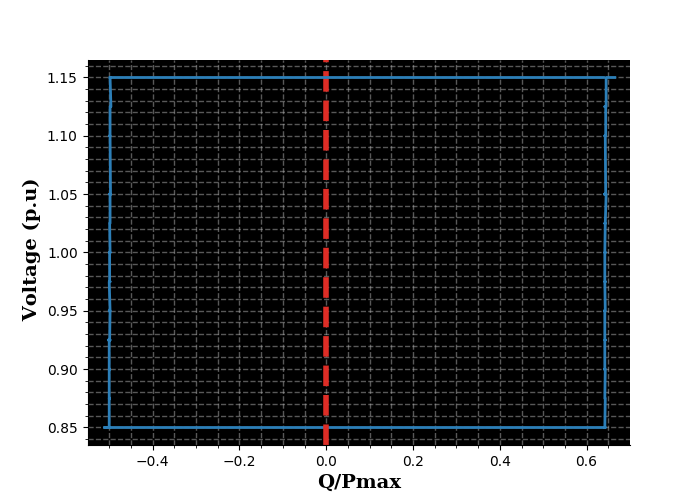

In [7]:
%matplotlib notebook
# fig, ax = plt.subplots(figsize=(5,5))
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(data['ppc:Q0_Scaled'],data['avr:VSP0_Scaled'],label='V(Q)',linewidth=2,c='#2c7fb8')
ax.axvline(linewidth=4, ls='--',c='#de2d26')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('#000000')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=1.15,xmin=0.045,xmax=0.95,linewidth=2, ls='-',c='#2c7fb8')

In [3]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
def custom_plot(x,ys):
    lines=[]
    axes=[]
    fig, ax = plt.subplots(figsize=(10,5))
    axes.append(ax)
    
    for arg in ys:
        if arg["ax2"]==True:
            ax2 = ax.twinx()
            axes.append(ax2)
            break
    i=1
    j=1
    for arg in ys:
        if arg["ax2"]==False:
            l,=ax.plot(x,arg["tr"],label="Y1,"+str(i),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            i+=1
        else:
            l,=ax2.plot(x,arg["tr"],label="Y2,"+str(j),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            j+=1

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('X Label goes here',fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
    
#     ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.05)
    if j > 1:
        ax2.spines["top"].set_visible(False)
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.set_ylabel('Y2 label goes here',fontdict=font)

    labs = [l.get_label() for l in lines]
    leg = axes[0].legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        ax2.set_ylim(m,M)
    except:pass

    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        ax.set_ylim(m,M)
    except:pass
    fig.autofmt_xdate()
    return (fig,fig.axes,lines,leg)


Please enter the path of you csv file:/home/skont/google_drive/PPC_Data/Kazakstan/M_KAT/mkat_24_01.csv


<IPython.core.display.Javascript object>


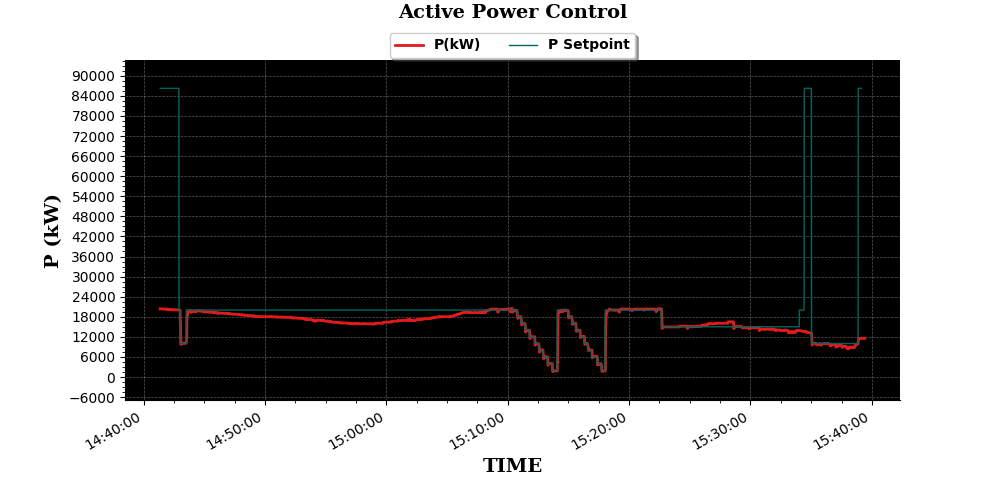

In [5]:
%matplotlib notebook
fig,axes,lines,leg=plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,0],en['P'].iloc[:,0])

In [6]:
glx=axes[0].get_xgridlines()[0]

In [7]:
glx.get_c()

'#b0b0b0'

In [6]:
%matplotlib notebook
from plot_maplot_v1 import *
from recourses import *
import base64
import io
import tkinter as tk
from tkinter import colorchooser,filedialog,simpledialog,messagebox,ttk,PhotoImage
from PIL import Image, ImageTk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
from matplotlib.lines import Line2D
from matplotlib.text import Text
import matplotlib as mpl
import sys
import re
import numpy as np
import matplotlib.dates as mdates
from colorutils import Color
import pickle

In [7]:
csv='test.pickle'

In [8]:
with open(csv, 'rb') as file:
        figx = pickle.load(file)

<IPython.core.display.Javascript object>


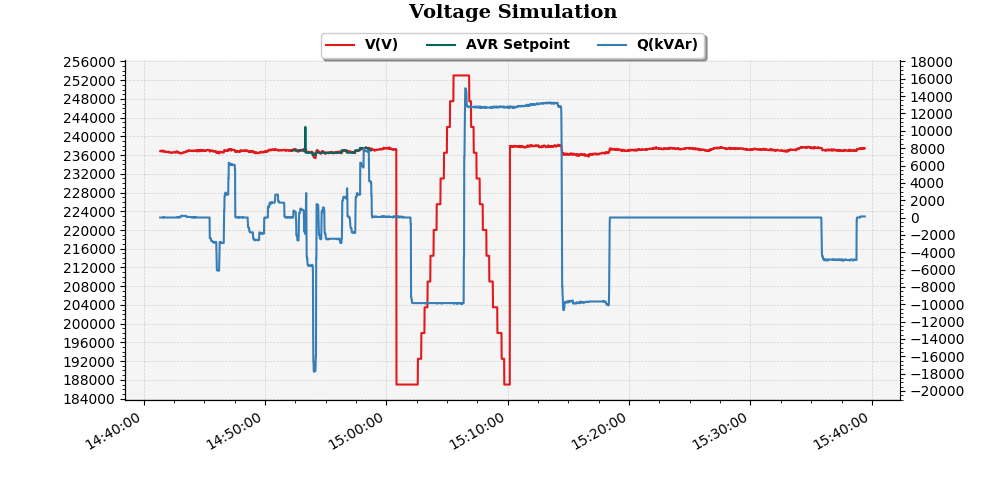

/home/spiros/my_git/plotly/plot_maplot_v1.py:249: UserWarning: Attempting to set identical bottom == top == (180400.0, 259600.0) results in singular transformations; automatically expanding.
  ax.set_ylim(m,M)


(<Figure size 1000x500 with 2 Axes>,
 <matplotlib.legend.Legend at 0x7fd713355898>)

In [19]:
plot_existing(figx)